In [1]:
from pathlib import Path
import pandas as pd
import  gc 
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
import xgboost as xgb
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [2]:
p = Path.home() / 'AppData' / 'Local' / 'Packages' / \
...     'PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0' / \
...     'LocalCache' / 'local-packages' / 'Python39' / 'Scripts' / 'sample_train_numerai.csv'

train = pd.read_csv(p)

In [3]:
y=train["target"]
X=train.drop("target",axis=1)
X

,era,data_type,feature_shaded_hallucinatory_dactylology,feature_itinerant_hexahedral_photoengraver,feature_prudent_pileate_oven,feature_subalpine_apothegmatical_ajax,feature_pistachio_atypical_malison,feature_symmetrical_spongy_tricentenary,feature_ungrounded_transpontine_winder,feature_aseptic_eely_hemiplegia,...,target_teager2b_20,target_teager2b_60,target_tyler_20,target_tyler_60,target_victor_20,target_victor_60,target_waldo_20,target_waldo_60,target_xerxes_20,target_xerxes_60
0,1,train,3,4,0,3,3,1,1,0,...,0.50,0.50,0.25,0.25,0.25,0.25,0.25,0.00,0.25,0.00
1,1,train,4,2,4,4,0,0,4,4,...,0.50,0.50,0.25,0.25,0.25,0.00,0.25,0.25,0.25,0.25
2,1,train,2,4,0,3,0,3,2,4,...,1.00,1.00,1.00,0.75,0.75,0.75,0.75,1.00,0.75,0.75
3,1,train,2,1,3,0,3,0,3,3,...,0.25,0.25,0.25,0.25,0.50,0.25,0.25,0.25,0.25,0.25
4,1,train,4,1,4,1,0,4,0,4,...,0.50,0.50,0.25,0.50,0.25,0.50,0.25,0.50,0.25,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,train,0,1,4,0,3,2,3,2,...,0.25,0.25,0.50,0.25,0.25,0.25,0.25,0.25,0.25,0.50
96,1,train,2,3,3,0,3,0,1,0,...,0.50,0.25,0.50,0.50,0.50,0.50,0.50,0.25,0.50,0.50
97,1,train,3,1,1,0,0,1,0,3,...,0.25,0.75,0.25,0.50,0.25,0.50,0.00,0.75,0.25,0.75
98,1,train,2,0,2,1,4,1,2,2,...,0.50,0.75,0.50,0.50,0.25,0.25,0.50,0.50,0.50,0.75


In [4]:
X=X.drop("era",axis=1)
X=X.drop("data_type",axis=1)
X


,feature_shaded_hallucinatory_dactylology,feature_itinerant_hexahedral_photoengraver,feature_prudent_pileate_oven,feature_subalpine_apothegmatical_ajax,feature_pistachio_atypical_malison,feature_symmetrical_spongy_tricentenary,feature_ungrounded_transpontine_winder,feature_aseptic_eely_hemiplegia,feature_elemental_easier_alkalinity,feature_cycloid_zymotic_galloway,...,target_teager2b_20,target_teager2b_60,target_tyler_20,target_tyler_60,target_victor_20,target_victor_60,target_waldo_20,target_waldo_60,target_xerxes_20,target_xerxes_60
0,3,4,0,3,3,1,1,0,0,0,...,0.50,0.50,0.25,0.25,0.25,0.25,0.25,0.00,0.25,0.00
1,4,2,4,4,0,0,4,4,3,0,...,0.50,0.50,0.25,0.25,0.25,0.00,0.25,0.25,0.25,0.25
2,2,4,0,3,0,3,2,4,2,2,...,1.00,1.00,1.00,0.75,0.75,0.75,0.75,1.00,0.75,0.75
3,2,1,3,0,3,0,3,3,4,2,...,0.25,0.25,0.25,0.25,0.50,0.25,0.25,0.25,0.25,0.25
4,4,1,4,1,0,4,0,4,4,0,...,0.50,0.50,0.25,0.50,0.25,0.50,0.25,0.50,0.25,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,4,0,3,2,3,2,4,1,...,0.25,0.25,0.50,0.25,0.25,0.25,0.25,0.25,0.25,0.50
96,2,3,3,0,3,0,1,0,2,3,...,0.50,0.25,0.50,0.50,0.50,0.50,0.50,0.25,0.50,0.50
97,3,1,1,0,0,1,0,3,1,2,...,0.25,0.75,0.25,0.50,0.25,0.50,0.00,0.75,0.25,0.75
98,2,0,2,1,4,1,2,2,1,2,...,0.50,0.75,0.50,0.50,0.25,0.25,0.50,0.50,0.50,0.75


In [5]:
good_cols=[col for col in X.columns if not col.startswith("target")]
 
X=X[good_cols]
X


,feature_shaded_hallucinatory_dactylology,feature_itinerant_hexahedral_photoengraver,feature_prudent_pileate_oven,feature_subalpine_apothegmatical_ajax,feature_pistachio_atypical_malison,feature_symmetrical_spongy_tricentenary,feature_ungrounded_transpontine_winder,feature_aseptic_eely_hemiplegia,feature_elemental_easier_alkalinity,feature_cycloid_zymotic_galloway,...,feature_sprucer_godlier_assembling,feature_venturesome_jesting_characterisation,feature_unstained_anhedonic_hetty,feature_vivisectional_latvian_dispensator,feature_pantheist_interramal_episcopalianism,feature_percurrent_deontic_sectionalisation,feature_myalgic_eulogistic_propagation,feature_pressor_chiropodial_hypertension,feature_diogenic_wooden_lout,feature_pleuritic_equipotent_loudmouth
0,3,4,0,3,3,1,1,0,0,0,...,2,2,2,2,2,2,2,2,2,2
1,4,2,4,4,0,0,4,4,3,0,...,2,2,2,2,2,2,2,2,2,2
2,2,4,0,3,0,3,2,4,2,2,...,2,2,2,2,2,2,2,2,2,2
3,2,1,3,0,3,0,3,3,4,2,...,2,2,2,2,2,2,2,2,2,2
4,4,1,4,1,0,4,0,4,4,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,4,0,3,2,3,2,4,1,...,2,2,2,2,2,2,2,2,2,2
96,2,3,3,0,3,0,1,0,2,3,...,2,2,2,2,2,2,2,2,2,2
97,3,1,1,0,0,1,0,3,1,2,...,2,2,2,2,2,2,2,2,2,2
98,2,0,2,1,4,1,2,2,1,2,...,2,2,2,2,2,2,2,2,2,2


In [6]:
X=X.reset_index(drop=True)
y=y.reset_index(drop=True)

In [7]:
X.isnull().values.any()

np.False_

In [8]:
del train
gc.collect()

0

In [9]:
train=X

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [11]:
X_train

,feature_shaded_hallucinatory_dactylology,feature_itinerant_hexahedral_photoengraver,feature_prudent_pileate_oven,feature_subalpine_apothegmatical_ajax,feature_pistachio_atypical_malison,feature_symmetrical_spongy_tricentenary,feature_ungrounded_transpontine_winder,feature_aseptic_eely_hemiplegia,feature_elemental_easier_alkalinity,feature_cycloid_zymotic_galloway,...,feature_sprucer_godlier_assembling,feature_venturesome_jesting_characterisation,feature_unstained_anhedonic_hetty,feature_vivisectional_latvian_dispensator,feature_pantheist_interramal_episcopalianism,feature_percurrent_deontic_sectionalisation,feature_myalgic_eulogistic_propagation,feature_pressor_chiropodial_hypertension,feature_diogenic_wooden_lout,feature_pleuritic_equipotent_loudmouth
15,0,4,3,4,2,1,4,2,0,2,...,2,2,2,2,2,2,2,2,2,2
40,4,4,2,4,0,4,4,0,4,0,...,2,2,2,2,2,2,2,2,2,2
96,2,3,3,0,3,0,1,0,2,3,...,2,2,2,2,2,2,2,2,2,2
9,0,3,0,3,4,4,1,1,0,2,...,2,2,2,2,2,2,2,2,2,2
72,2,3,2,3,3,2,0,2,3,1,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,4,1,3,0,4,0,1,1,2,1,...,2,2,2,2,2,2,2,2,2,2
71,0,4,0,1,3,0,1,0,0,0,...,2,2,2,2,2,2,2,2,2,2
14,1,0,1,0,4,0,4,1,2,2,...,2,2,2,2,2,2,2,2,2,2
92,0,3,3,2,4,1,0,2,0,1,...,2,2,2,2,2,2,2,2,2,2


In [12]:
X_test

,feature_shaded_hallucinatory_dactylology,feature_itinerant_hexahedral_photoengraver,feature_prudent_pileate_oven,feature_subalpine_apothegmatical_ajax,feature_pistachio_atypical_malison,feature_symmetrical_spongy_tricentenary,feature_ungrounded_transpontine_winder,feature_aseptic_eely_hemiplegia,feature_elemental_easier_alkalinity,feature_cycloid_zymotic_galloway,...,feature_sprucer_godlier_assembling,feature_venturesome_jesting_characterisation,feature_unstained_anhedonic_hetty,feature_vivisectional_latvian_dispensator,feature_pantheist_interramal_episcopalianism,feature_percurrent_deontic_sectionalisation,feature_myalgic_eulogistic_propagation,feature_pressor_chiropodial_hypertension,feature_diogenic_wooden_lout,feature_pleuritic_equipotent_loudmouth
83,0,1,4,1,1,0,4,0,4,4,...,2,2,2,2,2,2,2,2,2,2
53,1,3,1,3,0,1,1,0,3,2,...,2,2,2,2,2,2,2,2,2,2
70,3,2,0,4,3,1,4,0,1,4,...,2,2,2,2,2,2,2,2,2,2
45,1,2,4,1,0,2,3,3,1,3,...,2,2,2,2,2,2,2,2,2,2
44,4,3,0,2,0,1,0,4,3,0,...,2,2,2,2,2,2,2,2,2,2
39,1,3,3,3,0,0,4,3,3,1,...,2,2,2,2,2,2,2,2,2,2
22,1,2,1,1,3,1,0,2,4,4,...,2,2,2,2,2,2,2,2,2,2
80,2,4,2,3,0,3,3,3,4,0,...,2,2,2,2,2,2,2,2,2,2
10,4,0,0,4,4,0,0,0,2,0,...,2,2,2,2,2,2,2,2,2,2
0,3,4,0,3,3,1,1,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [13]:
y_train

15    0.00
40    0.75
96    0.50
9     0.50
72    0.75
      ... 
60    1.00
71    0.75
14    1.00
92    0.50
51    0.50
Name: target, Length: 75, dtype: float64

In [14]:
y_test

83    0.75
53    0.75
70    0.75
45    0.75
44    0.50
39    0.50
22    0.50
80    0.50
10    0.25
0     0.25
18    0.75
30    0.25
73    0.50
33    0.25
90    0.50
4     0.25
76    0.50
77    0.50
12    0.50
31    0.75
55    0.25
88    0.75
26    0.75
42    0.50
69    0.50
Name: target, dtype: float64

In [15]:
train.head()

,feature_shaded_hallucinatory_dactylology,feature_itinerant_hexahedral_photoengraver,feature_prudent_pileate_oven,feature_subalpine_apothegmatical_ajax,feature_pistachio_atypical_malison,feature_symmetrical_spongy_tricentenary,feature_ungrounded_transpontine_winder,feature_aseptic_eely_hemiplegia,feature_elemental_easier_alkalinity,feature_cycloid_zymotic_galloway,...,feature_sprucer_godlier_assembling,feature_venturesome_jesting_characterisation,feature_unstained_anhedonic_hetty,feature_vivisectional_latvian_dispensator,feature_pantheist_interramal_episcopalianism,feature_percurrent_deontic_sectionalisation,feature_myalgic_eulogistic_propagation,feature_pressor_chiropodial_hypertension,feature_diogenic_wooden_lout,feature_pleuritic_equipotent_loudmouth
0,3,4,0,3,3,1,1,0,0,0,...,2,2,2,2,2,2,2,2,2,2
1,4,2,4,4,0,0,4,4,3,0,...,2,2,2,2,2,2,2,2,2,2
2,2,4,0,3,0,3,2,4,2,2,...,2,2,2,2,2,2,2,2,2,2
3,2,1,3,0,3,0,3,3,4,2,...,2,2,2,2,2,2,2,2,2,2
4,4,1,4,1,0,4,0,4,4,0,...,2,2,2,2,2,2,2,2,2,2


In [16]:
model=xgb.XGBRegressor( n_estimators=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.057472047721980175


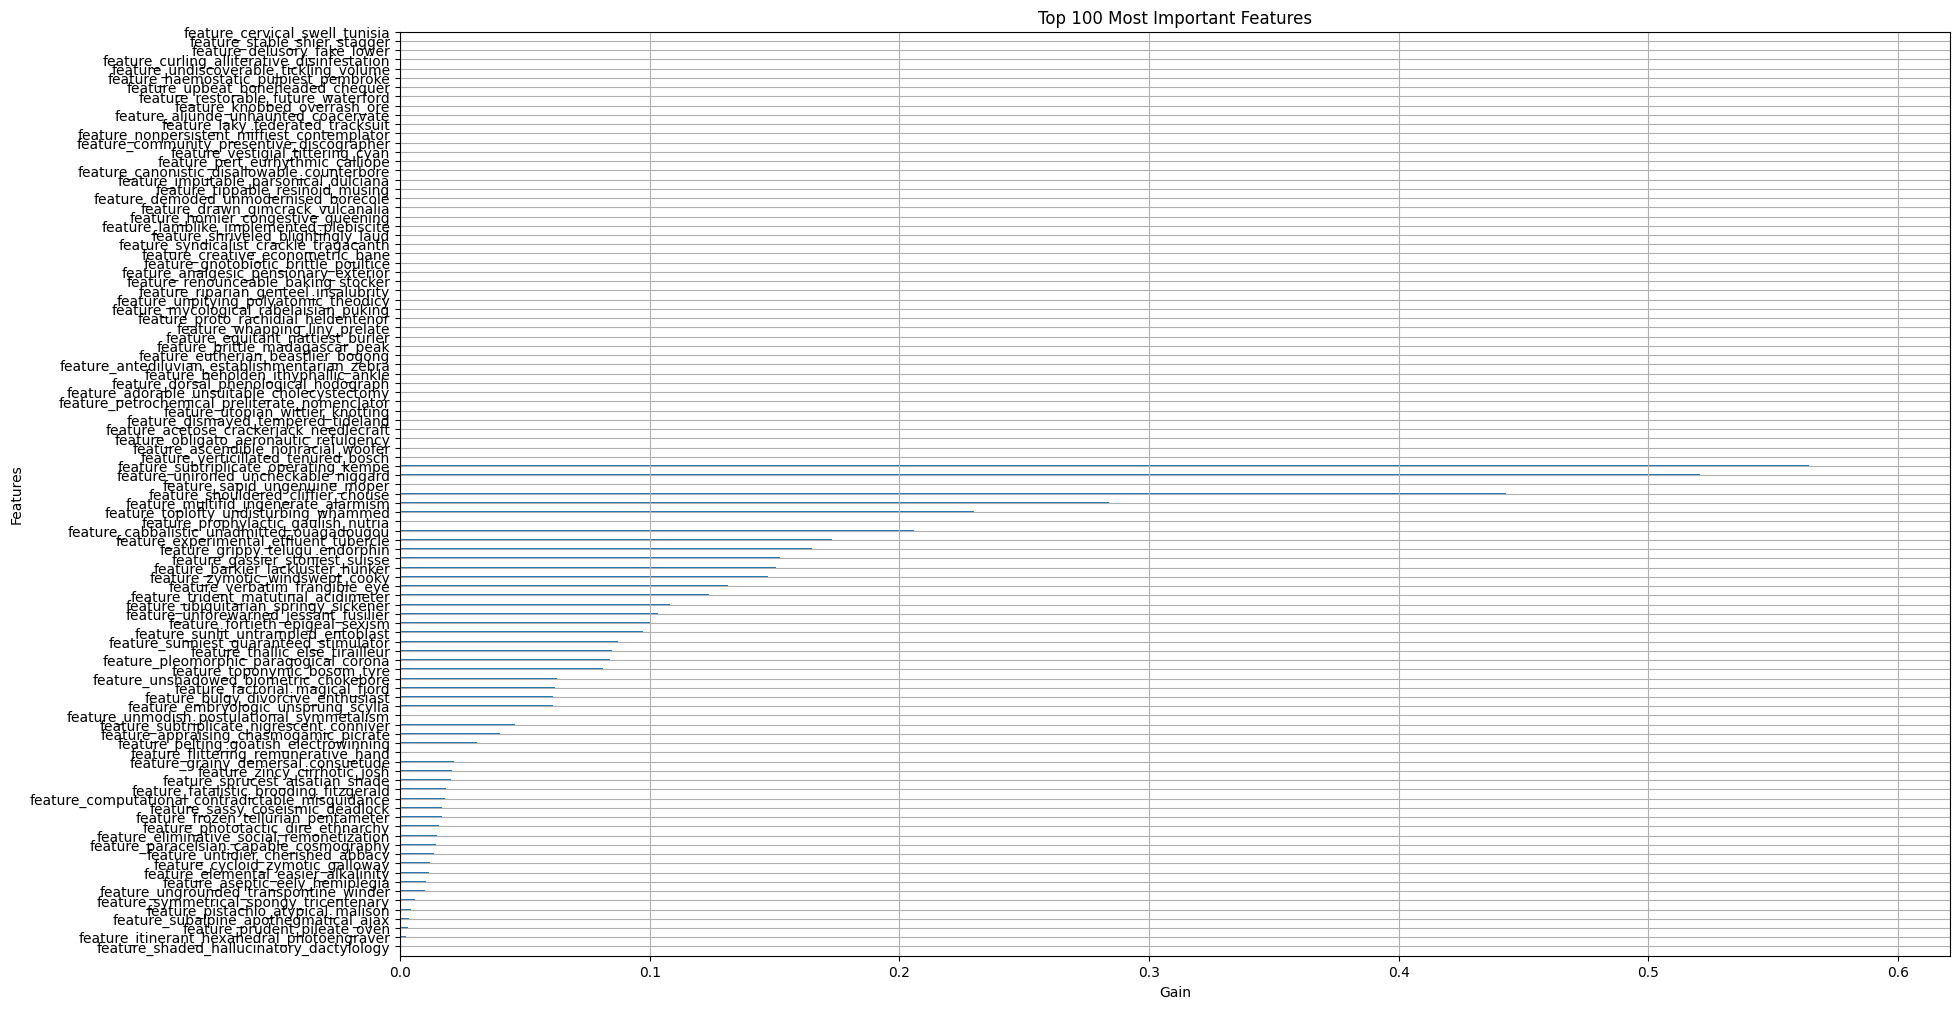

In [17]:
top_n = 100
feature_names = train.columns.tolist() 
fig, ax = plt.subplots(figsize=(20, 12))
xgb.plot_importance(model, ax=ax, importance_type='gain',
                    max_num_features=top_n, show_values=False)
plt.yticks(range(top_n), feature_names[:top_n])
plt.xlabel('Gain')
plt.title(f'Top {top_n} Most Important Features')
plt.show()

In [18]:
X.columns

Index(['feature_shaded_hallucinatory_dactylology',
       'feature_itinerant_hexahedral_photoengraver',
       'feature_prudent_pileate_oven', 'feature_subalpine_apothegmatical_ajax',
       'feature_pistachio_atypical_malison',
       'feature_symmetrical_spongy_tricentenary',
       'feature_ungrounded_transpontine_winder',
       'feature_aseptic_eely_hemiplegia',
       'feature_elemental_easier_alkalinity',
       'feature_cycloid_zymotic_galloway',
       ...
       'feature_sprucer_godlier_assembling',
       'feature_venturesome_jesting_characterisation',
       'feature_unstained_anhedonic_hetty',
       'feature_vivisectional_latvian_dispensator',
       'feature_pantheist_interramal_episcopalianism',
       'feature_percurrent_deontic_sectionalisation',
       'feature_myalgic_eulogistic_propagation',
       'feature_pressor_chiropodial_hypertension',
       'feature_diogenic_wooden_lout',
       'feature_pleuritic_equipotent_loudmouth'],
      dtype='object', length=2376)

In [19]:
def cols (x):
    a=np.array(x)
    cols=[s for s in range(100)]
    s=a.sum()
    return a.sum()%10
    

In [20]:
X["columns_FEAT"]=X.apply(cols,axis=1)

In [21]:
X.head()

,feature_shaded_hallucinatory_dactylology,feature_itinerant_hexahedral_photoengraver,feature_prudent_pileate_oven,feature_subalpine_apothegmatical_ajax,feature_pistachio_atypical_malison,feature_symmetrical_spongy_tricentenary,feature_ungrounded_transpontine_winder,feature_aseptic_eely_hemiplegia,feature_elemental_easier_alkalinity,feature_cycloid_zymotic_galloway,...,feature_venturesome_jesting_characterisation,feature_unstained_anhedonic_hetty,feature_vivisectional_latvian_dispensator,feature_pantheist_interramal_episcopalianism,feature_percurrent_deontic_sectionalisation,feature_myalgic_eulogistic_propagation,feature_pressor_chiropodial_hypertension,feature_diogenic_wooden_lout,feature_pleuritic_equipotent_loudmouth,columns_FEAT
0,3,4,0,3,3,1,1,0,0,0,...,2,2,2,2,2,2,2,2,2,5
1,4,2,4,4,0,0,4,4,3,0,...,2,2,2,2,2,2,2,2,2,4
2,2,4,0,3,0,3,2,4,2,2,...,2,2,2,2,2,2,2,2,2,2
3,2,1,3,0,3,0,3,3,4,2,...,2,2,2,2,2,2,2,2,2,0
4,4,1,4,1,0,4,0,4,4,0,...,2,2,2,2,2,2,2,2,2,4
